In [ ]:
!nvidia-smi

Fri Jun 30 07:30:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Include Dataset Snippet Here.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Oz3OqxiF2iie4BXTGtwR")
project = rf.workspace("abby").project("cars-ggvem")
dataset = project.version(5).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Cars-5 in yolov8:: 100%|██████████| 6172/6172 [00:01<00:00, 5979.35it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=50 imgsz=256 plots=True

/content
100% 83.7M/83.7M [00:01<00:00, 48.0MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=/content/datasets/Cars-5/data.yaml, epochs=50, patience=50, batch=16, imgsz=256, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

In [ ]:
!ls {HOME}/runs/detect/train3/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch5400.jpg
events.out.tfevents.1688110875.e8be37d0fecb.3735.0  train_batch5401.jpg
F1_curve.png					    train_batch5402.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content


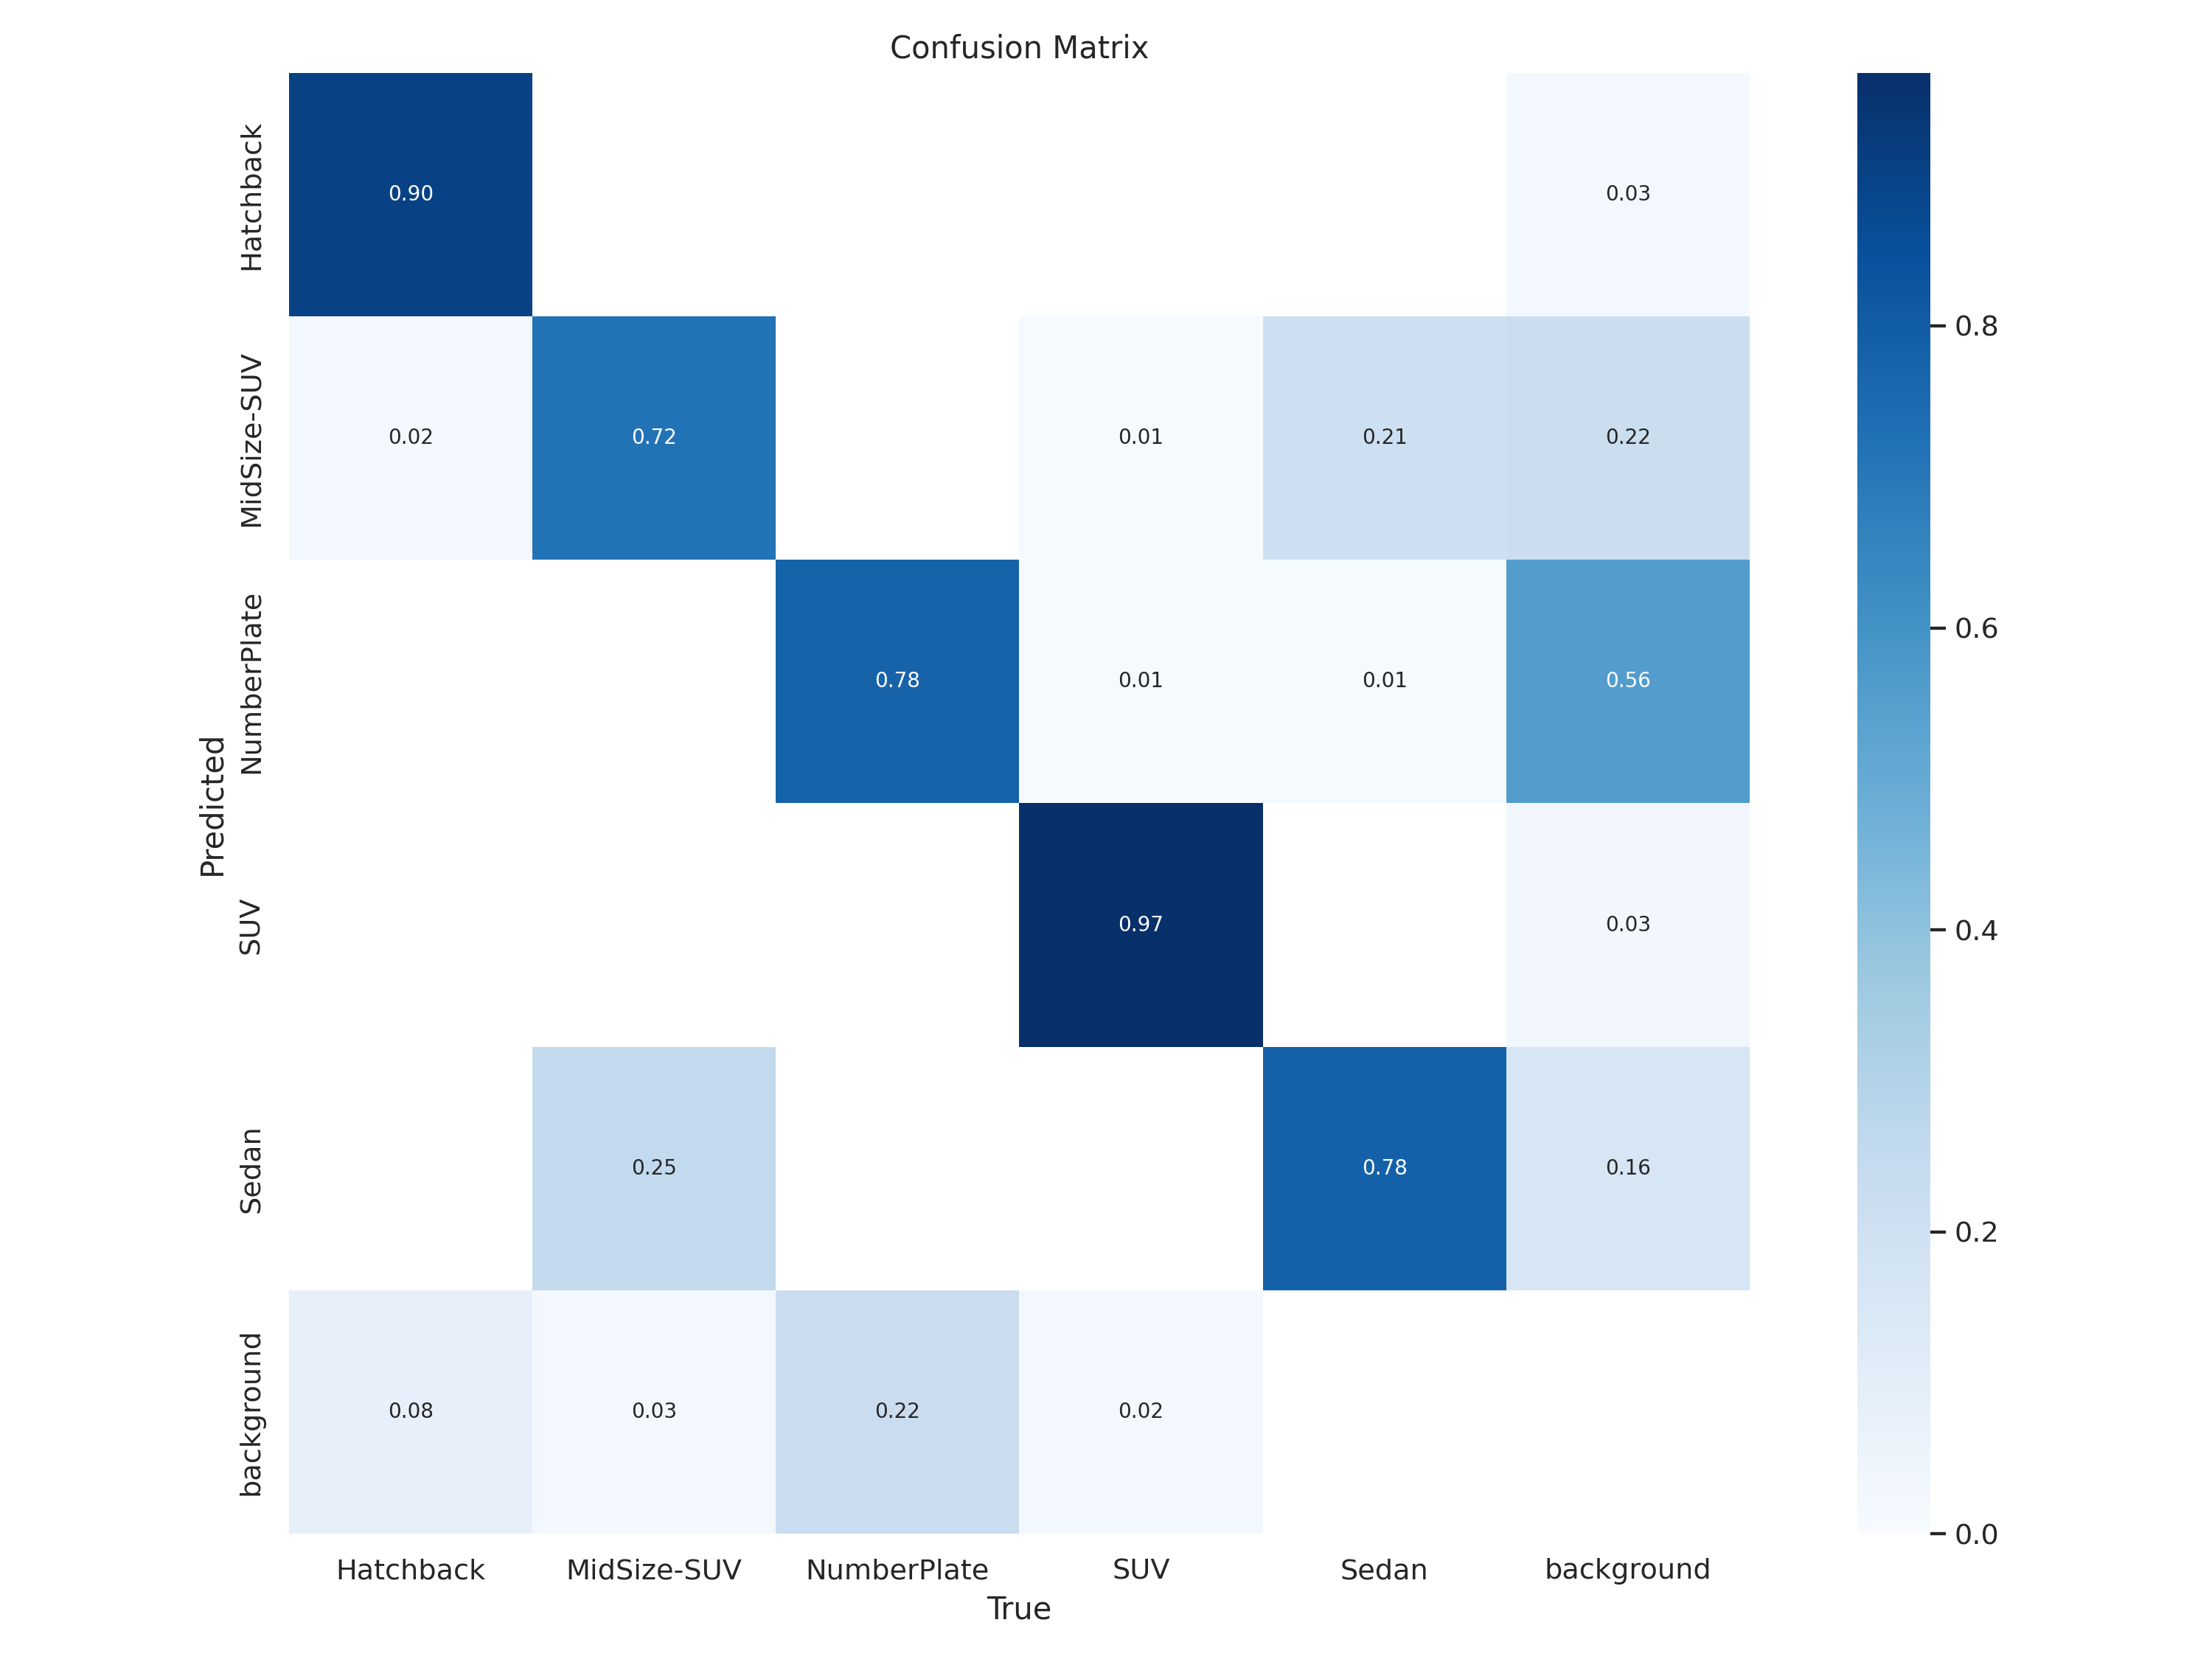

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/train3/confusion_matrix.png', width=600)

/content


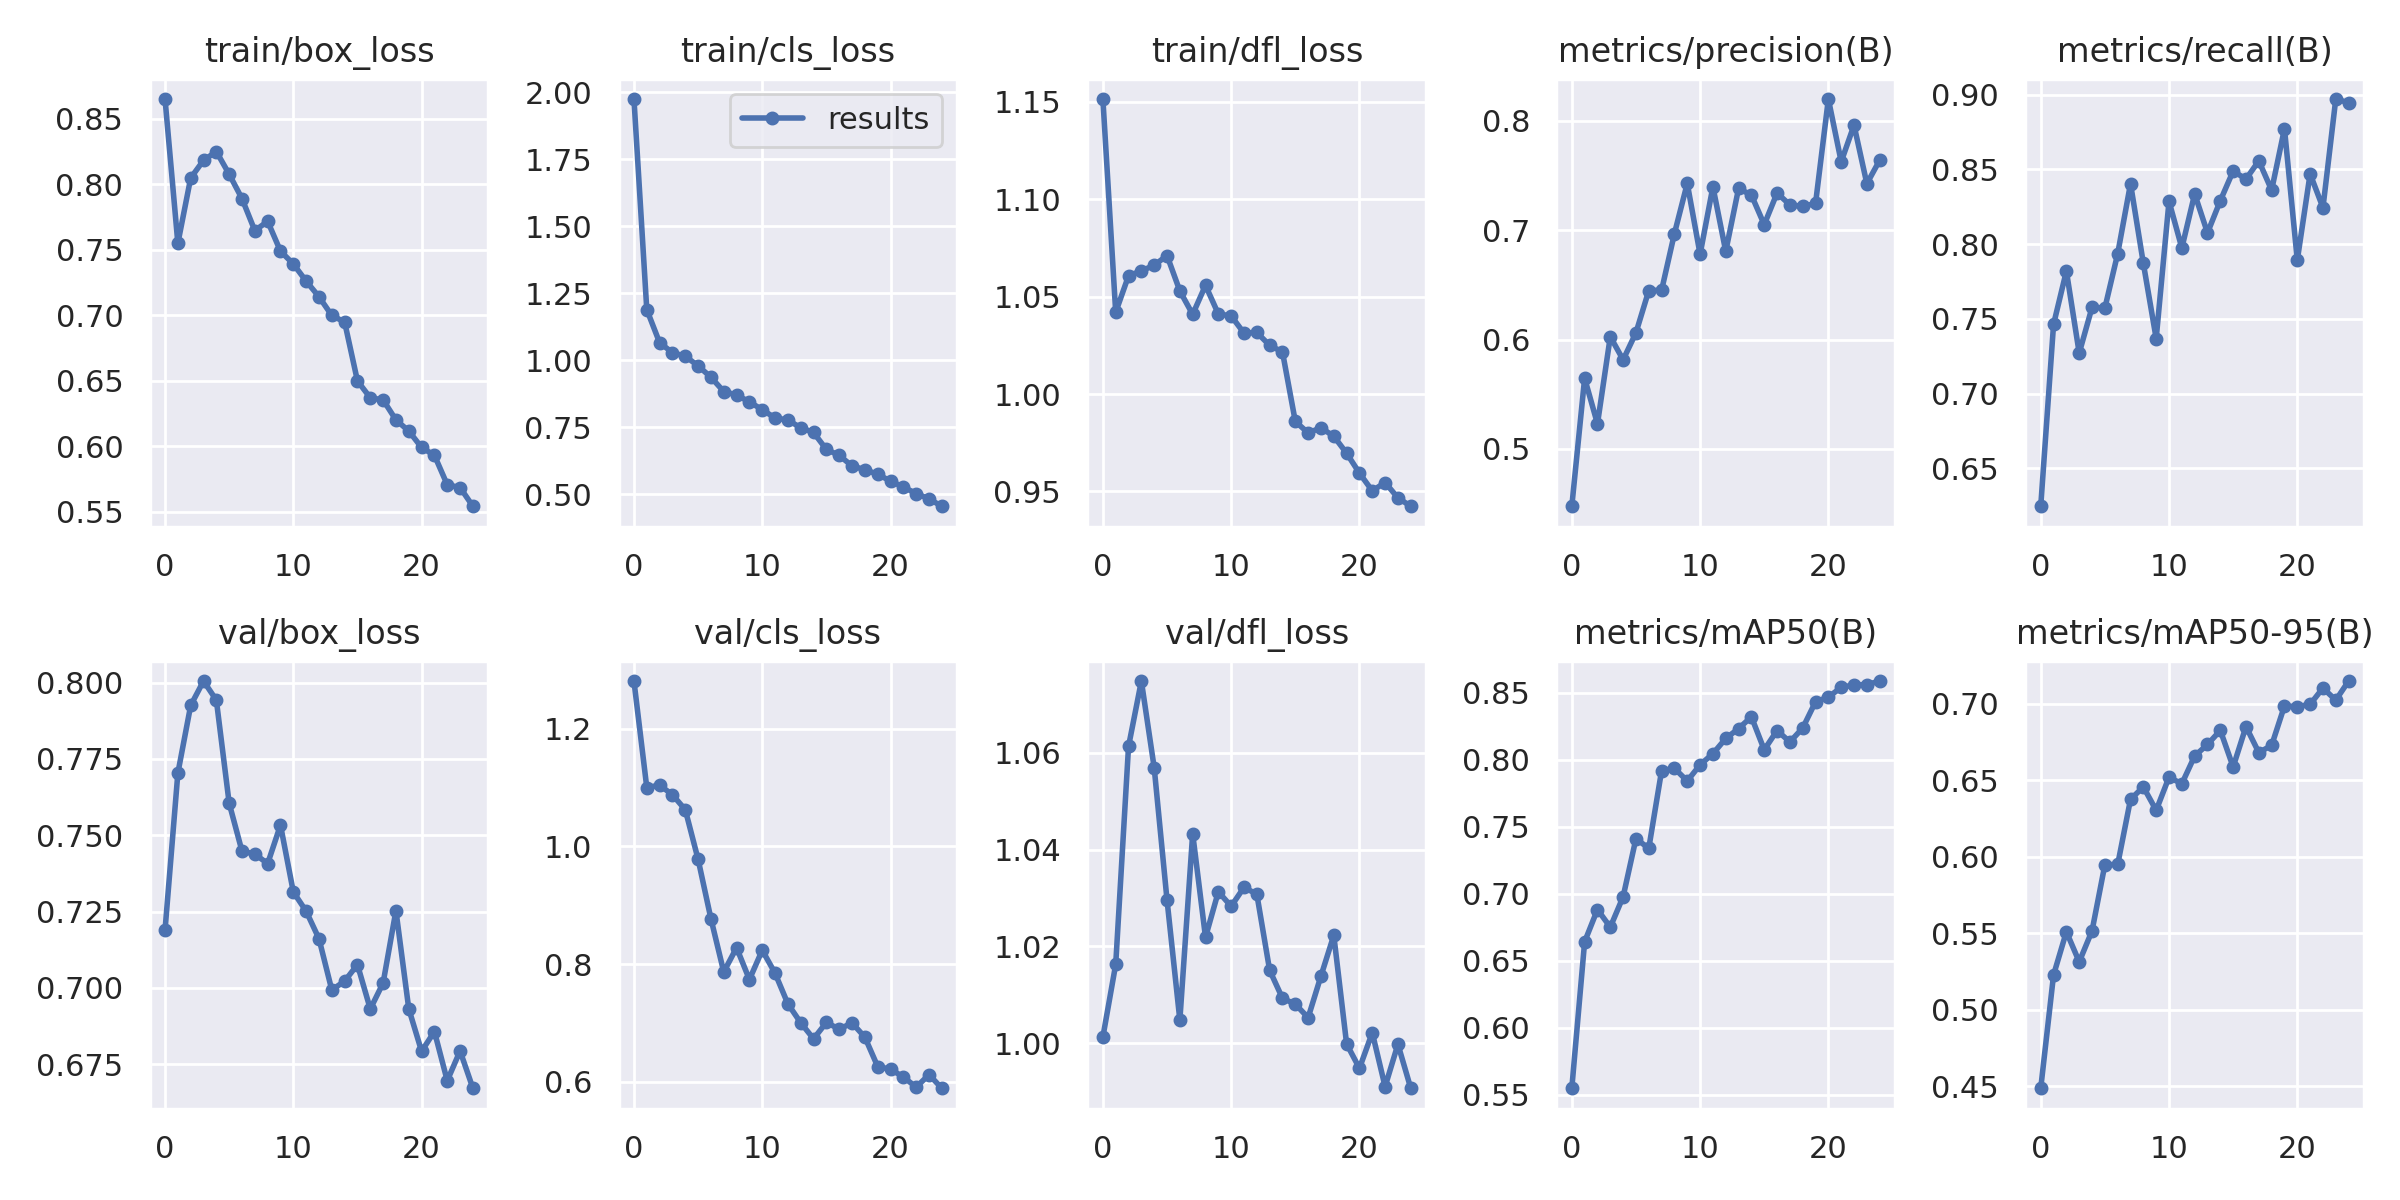

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/train2/results.png', width=600)

/content


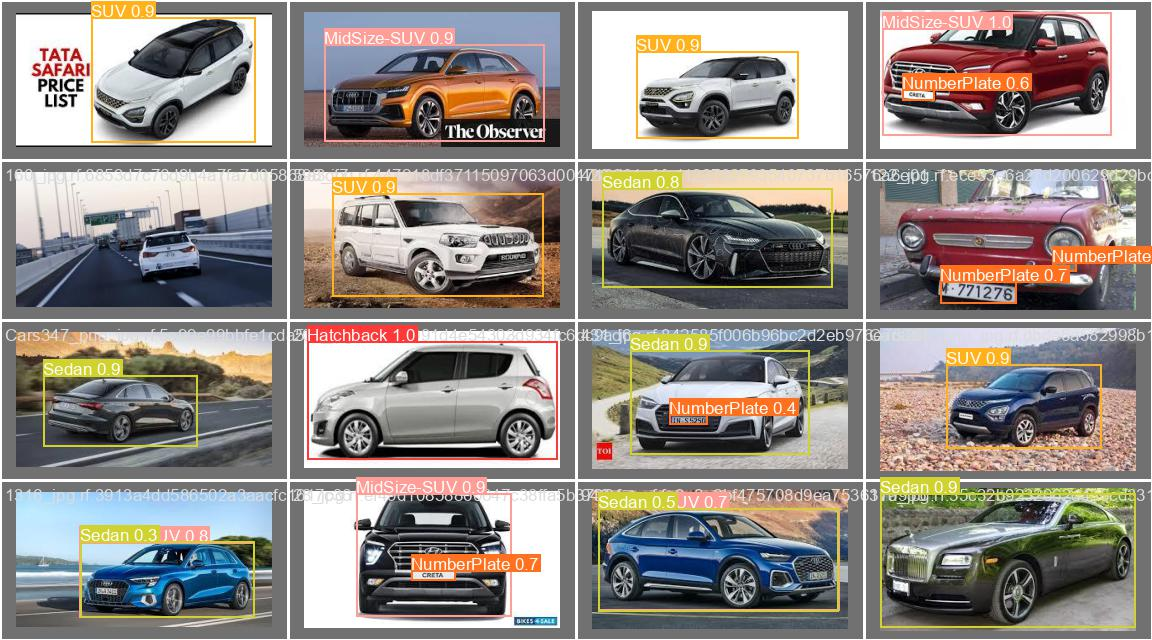

In [ ]:
%cd {HOME}
Image(filename="/content/runs/detect/train3/val_batch1_pred.jpg", width=2000)

In [ ]:
%cd {HOME}

!yolo task=detect mode=test model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
AttributeError: 'YOLO' object has no attribute 'test'. Did you mean: 'reset'?


Custom Video Check

In [ ]:
from ultralytics import YOLO

In [ ]:
# Load a model
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # load a pretrained model (recommended for training)

In [ ]:
model.predict("/content/datasets/Cars-5/train/images/1001_jpg.rf.cb59d0cefcd6ec40026f36f2292672bf.jpg", save=True, imgsz=320, conf=0.5)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
Results saved to runs/detect/predict2


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[ 30.00000,  35.00000, 226.00000, 170.00000,   0.89815,   4.00000]], device='cuda:0')]

In [ ]:
source="/content/Screenshot 2023-06-21 at 11.34.38 PM.png"

In [ ]:
model.predict(source, save=True, imgsz=320, conf=0.5,retina_masks=True)

Results saved to runs/detect/predict3


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[6.34000e+02, 3.37000e+02, 7.72000e+02, 4.06000e+02, 6.75452e-01, 2.00000e+00]], device='cuda:0')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Source file path (change it to your video file)
source_file_path = '/content/runs/detect/predict3/watch_v_kAd0HLBjsTI_t_22s_pp_ygUEQU5QUg_3D_3D.mp4'

# Destination folder path in Google Drive (change it to your desired folder)
destination_folder_path = '/content/drive/MyDrive/'

# Copy the file to Google Drive
!cp "{source_file_path}" "{destination_folder_path}"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
